<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Importer_Risk_Prediction/Gradient_Boost_Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing the Relevant Libraries**

In [ ]:
# Installing the relevant libraries - XGBoost
# !pip install xgboost

In [ ]:
# Installing the relevant libraries - XAI
# !pip install lime
# !pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=cab6a77bf56bd06eda3c60a76414b89a8236a7bd0165de1dbb2e255b2e83cd32
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


# **Importing the Necessary Libraries**

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import shap
import lime
import pickle
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading the Dataset**

In [ ]:
# Loading the Dataset
data = pd.read_excel("/content/drive/MyDrive/risk-prediction/Dataset/expanded_chemical_import_risk_data_with_probabilities.xlsx")

In [ ]:
# Displaying the Dataset Head
data.head()

,Importer_ID,Import_Frequency,Import_Quantity (kg),Chemical_Name,HS Code,Country_of_Origin,Importation_Description,Compliance_History,Past_Violations,Financial_Stability,Risk_Category,Import_Frequency_Norm,Import_Quantity_Norm,Past_Violations_Norm,Risk_Probability
0,IMP001,36,5199,"Fluorides; fluorosilicates, fluoroaluminates, ...",282619,Pakistan,Used in aluminum smelting & glass manufacturing,Excellent,4,High,Risky,0.241611,0.010513,0.8,0.455212
1,IMP002,26,3398,Sulphuric acid; oleum,280700,Brazil,Petroleum refining & chemical synthesis,Poor,1,High,Not Risky,0.174497,0.006871,0.2,0.378137
2,IMP003,47,5626,Sulphuric acid; oleum,280700,India,Petroleum refining & chemical synthesis,Average,5,Medium,Risky,0.315436,0.011376,1.0,0.672681
3,IMP004,91,7700,Cyanides and cyanide oxides: Of sodium,283711,India,Gold mining & electroplating industry,Excellent,4,Medium,Not Risky,0.610738,0.015570,0.8,0.432631
4,IMP005,63,8377,Nitric acid; sulphonitric acids,280800,China,Used in fertilizer manufacturing & explosives ...,Average,4,Low,Not Risky,0.422819,0.016939,0.8,0.573976


# **Exploratory Data Analysis**

In [ ]:
# Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Importer_ID              400 non-null    object 
 1   Import_Frequency         400 non-null    int64  
 2   Import_Quantity (kg)     400 non-null    int64  
 3   Chemical_Name            400 non-null    object 
 4   HS Code                  400 non-null    int64  
 5   Country_of_Origin        400 non-null    object 
 6   Importation_Description  400 non-null    object 
 7   Compliance_History       400 non-null    object 
 8   Past_Violations          400 non-null    int64  
 9   Financial_Stability      400 non-null    object 
 10  Risk_Category            400 non-null    object 
 11  Import_Frequency_Norm    400 non-null    float64
 12  Import_Quantity_Norm     400 non-null    float64
 13  Past_Violations_Norm     400 non-null    float64
 14  Risk_Probability         4

### **Identifying Categorical and Numerical Columns**

In [ ]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

## **Categorical Features**

In [ ]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_features:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(data[categorical_features].dtypes)

Categorical Features:
- Importer_ID
- Chemical_Name
- Country_of_Origin
- Importation_Description
- Compliance_History
- Financial_Stability
- Risk_Category

Data Type of Categorical Features:
Importer_ID                object
Chemical_Name              object
Country_of_Origin          object
Importation_Description    object
Compliance_History         object
Financial_Stability        object
Risk_Category              object
dtype: object


In [ ]:
# Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Importer_ID              400 non-null    object 
 1   Import_Frequency         400 non-null    int64  
 2   Import_Quantity (kg)     400 non-null    int64  
 3   Chemical_Name            400 non-null    object 
 4   HS Code                  400 non-null    int64  
 5   Country_of_Origin        400 non-null    object 
 6   Importation_Description  400 non-null    object 
 7   Compliance_History       400 non-null    object 
 8   Past_Violations          400 non-null    int64  
 9   Financial_Stability      400 non-null    object 
 10  Risk_Category            400 non-null    object 
 11  Import_Frequency_Norm    400 non-null    float64
 12  Import_Quantity_Norm     400 non-null    float64
 13  Past_Violations_Norm     400 non-null    float64
 14  Risk_Probability         4

In [ ]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

Importer_ID
IMP001    1
IMP264    1
IMP274    1
IMP273    1
IMP272    1
         ..
IMP131    1
IMP130    1
IMP129    1
IMP128    1
IMP400    1
Name: count, Length: 400, dtype: int64
 
Chemical_Name
Bromine                                                                           45
Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts    40
Chlorine                                                                          39
Cyanides and cyanide oxides: Of sodium                                            35
Iodine                                                                            34
Chlorates and perchlorates; bromates and perbromates; iodates and periodates      32
Cyanides and cyanide oxides: Other                                                32
Halides and halide oxides of non-metals                                           31
Nitric acid; sulphonitric acids                      

In [ ]:
# Displaying the categorical columns which contains null values and their counts
print("Categorical columns with null values and their counts:")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Categorical columns with null values and their counts:


In [ ]:
# Displaying the categorical columns which contain 'Unknown' values and their relevant counts
print("Categorical columns with 'Unknown' values and their counts:")
for col in categorical_features:
    unknown_count = (data[col] == 'Unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")

Categorical columns with 'Unknown' values and their counts:


## **Visualizing the Distribution of the Categorical columns**

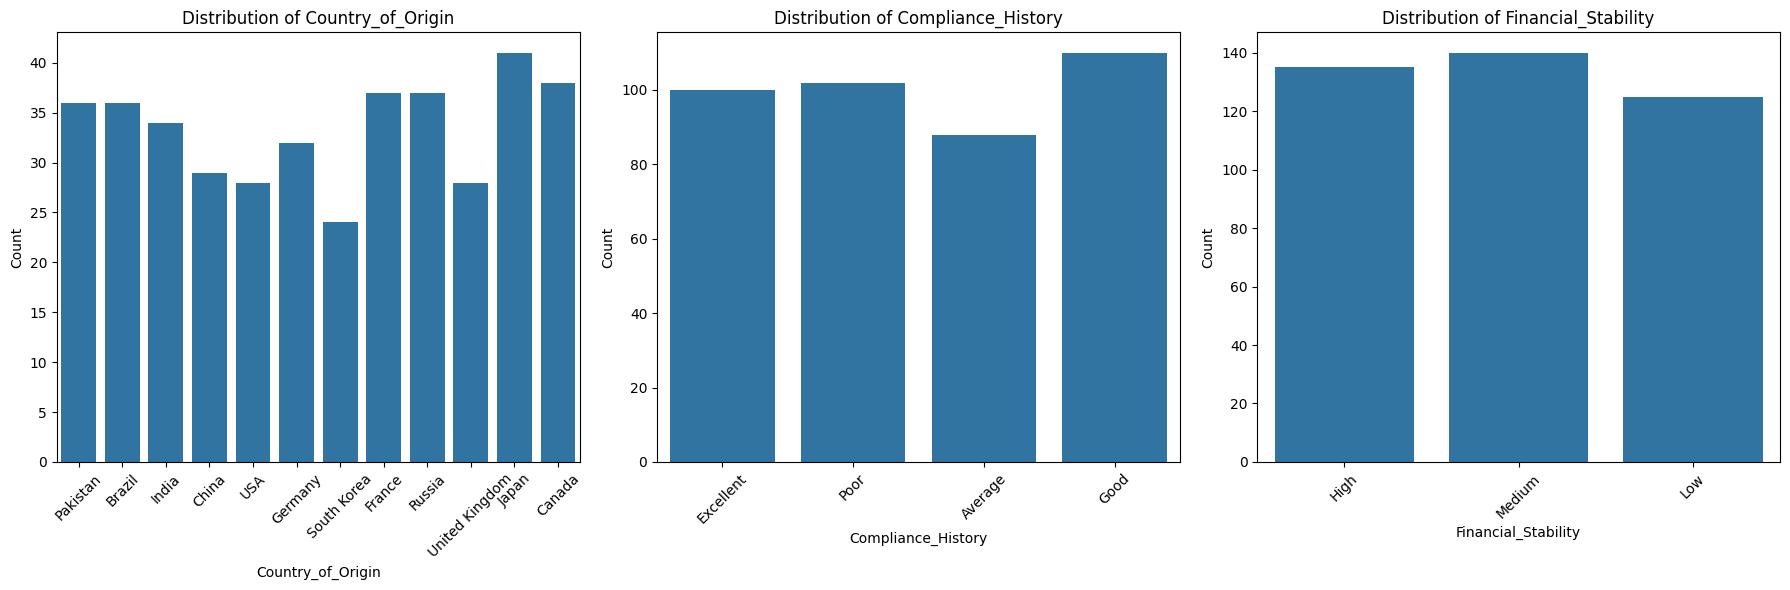

In [ ]:
# List of specific categorical features to visualize
selected_features = ['Country_of_Origin', 'Compliance_History', 'Financial_Stability']

# Create a single row with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(selected_features):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## **Numerical Features**

In [ ]:
# Numerical Features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Displaying the Numerical Columns
print("Numerical Features:")
print(numerical_features)

Numerical Features:
Index(['Import_Frequency', 'Import_Quantity (kg)', 'HS Code',
       'Past_Violations', 'Import_Frequency_Norm', 'Import_Quantity_Norm',
       'Past_Violations_Norm', 'Risk_Probability'],
      dtype='object')


In [ ]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

Import_Frequency
63     10
57      8
37      8
108     7
60      7
       ..
64      1
109     1
131     1
116     1
134     1
Name: count, Length: 130, dtype: int64
 
Import_Quantity (kg)
6877      5
1851      5
7713      5
449044    4
4974      4
         ..
8619      1
14043     1
6959      1
18118     1
1895      1
Name: count, Length: 285, dtype: int64
 
HS Code
280110    39
282911    39
310210    39
282611    35
280130    35
283719    35
282619    34
280700    34
280120    29
284700    29
283711    28
280800    24
Name: count, dtype: int64
 
Past_Violations
4    77
1    73
3    71
0    66
5    57
2    56
Name: count, dtype: int64
 
Import_Frequency_Norm
0.422819    10
0.382550     8
0.248322     8
0.724832     7
0.402685     7
            ..
0.429530     1
0.731544     1
0.879195     1
0.778523     1
0.899329     1
Name: count, Length: 130, dtype: int64
 
Import_Quantity_Norm
0.013906    5
0.003743    5
0.015596    5
0.9080

In [ ]:
# Displaying the numerical columns with null values and their relevant counts
print("Numerical columns with null values and their relevant counts:")
for col in numerical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Numerical columns with null values and their relevant counts:


## **Visualization of the Correlation HeatMap**

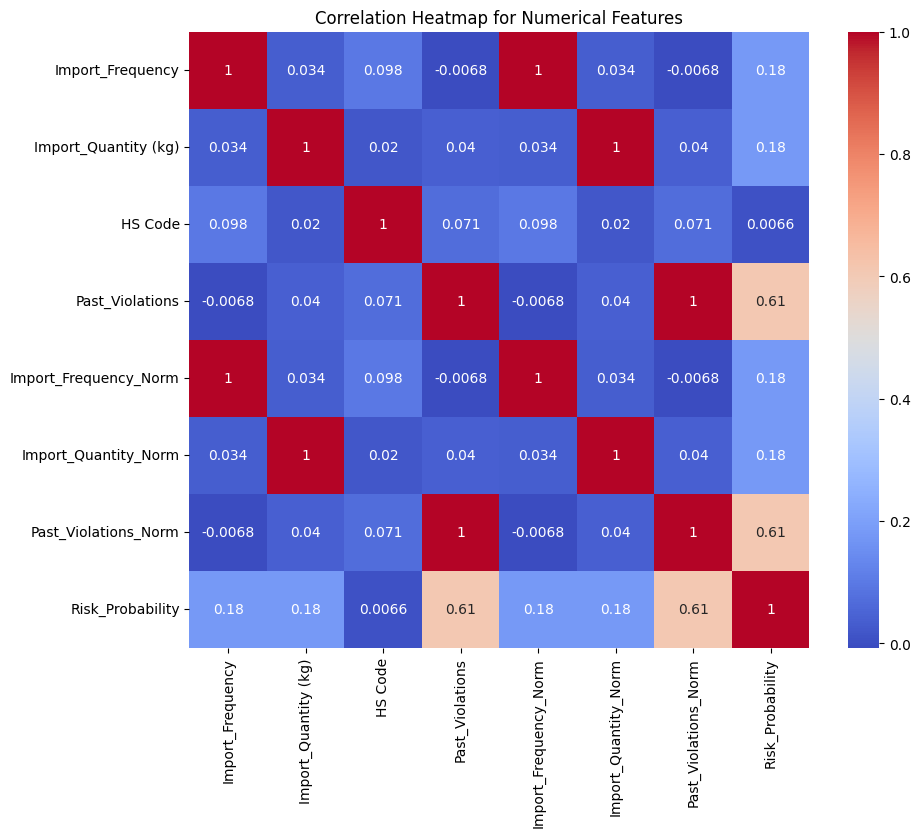

In [ ]:
# Plotting the Correlation HeatMap for the Numerical Features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

## **Handling the Outliers**

## **Visualizing the Outliers**

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

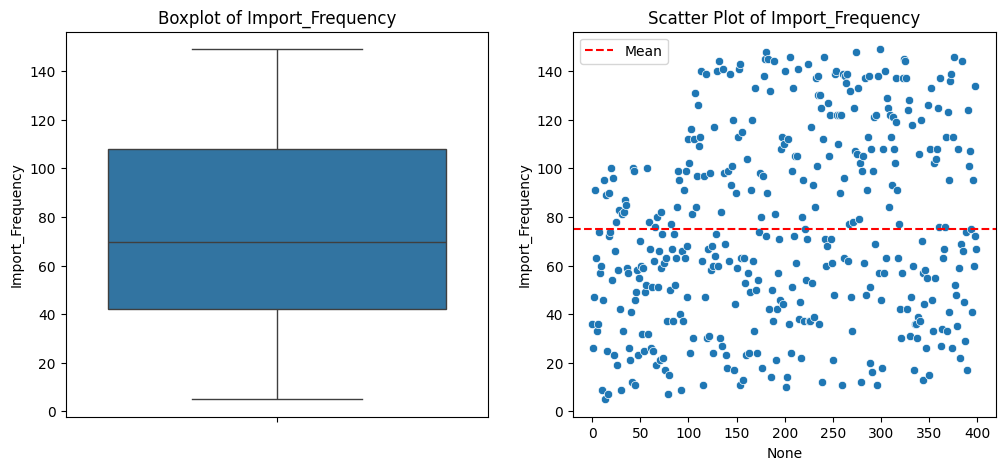

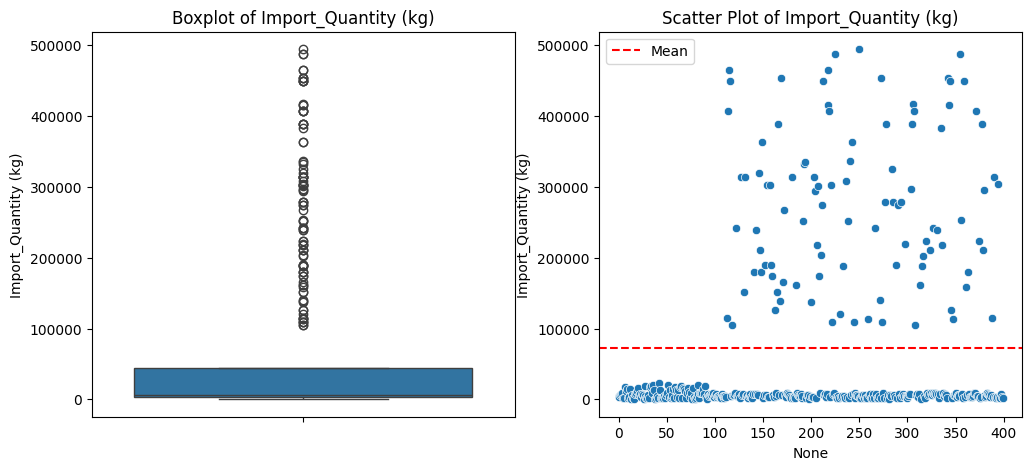

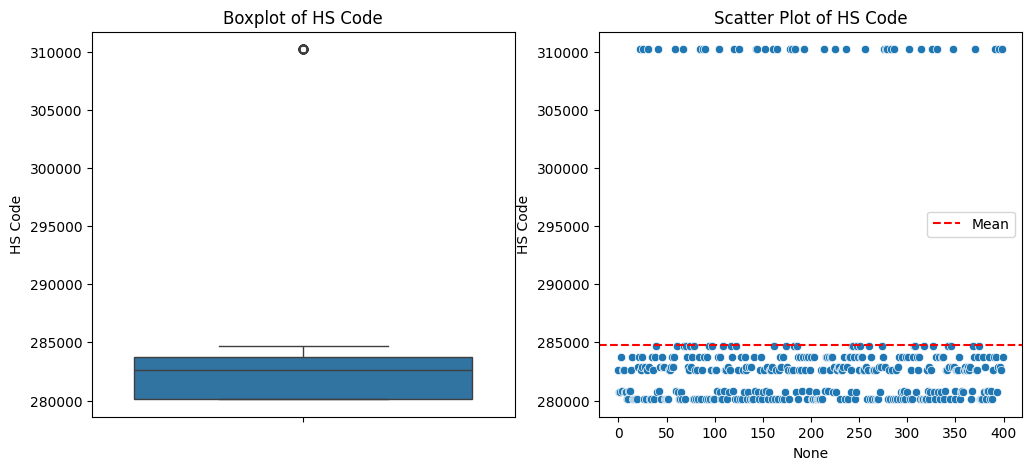

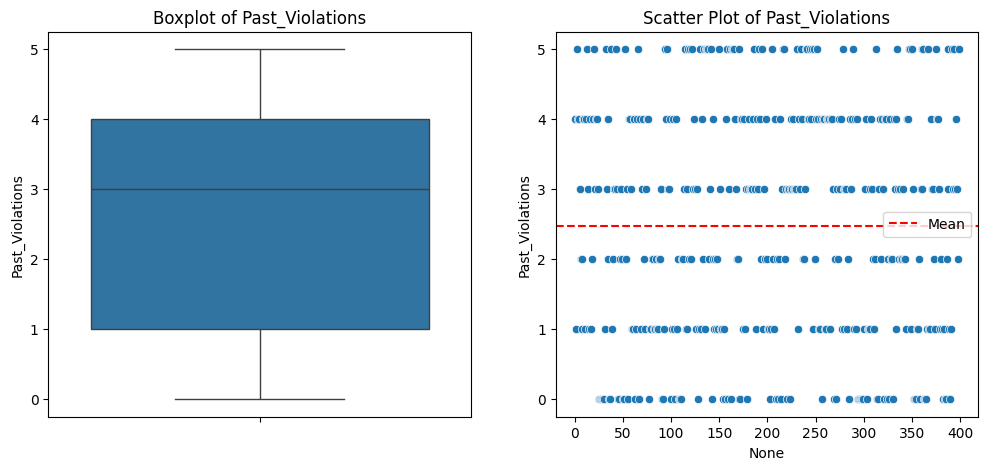

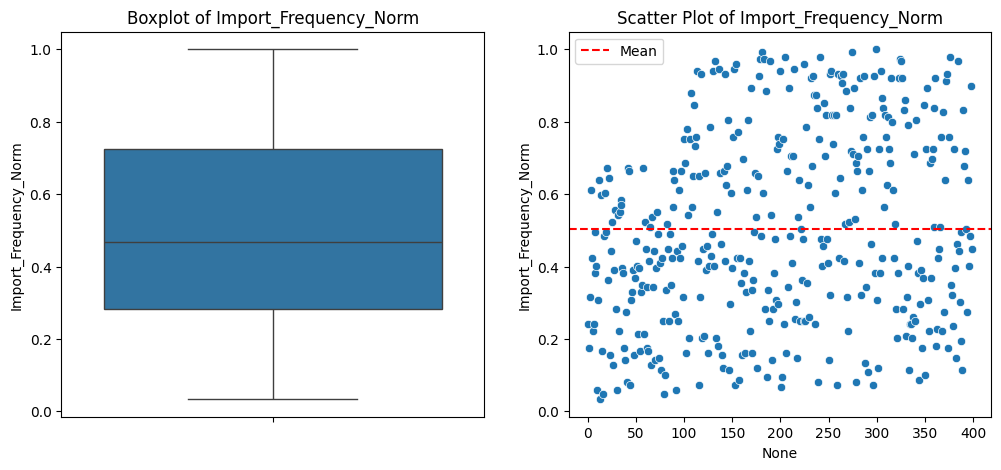

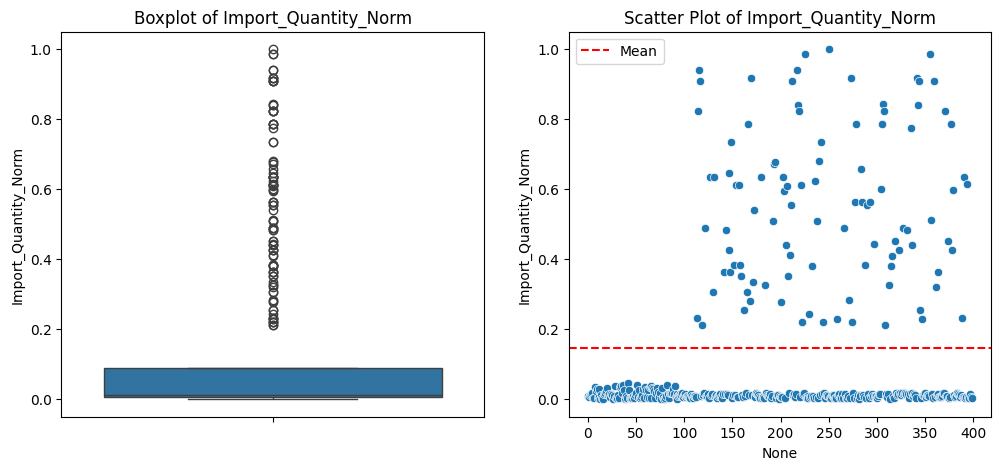

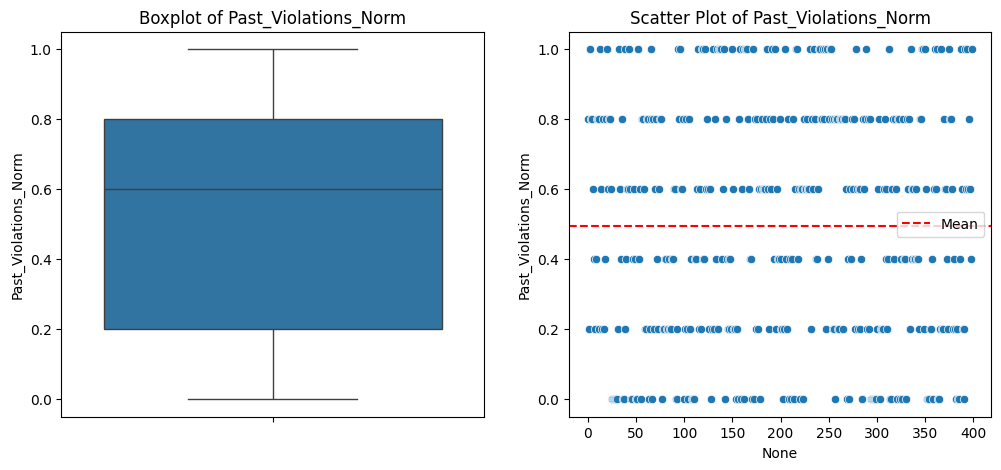

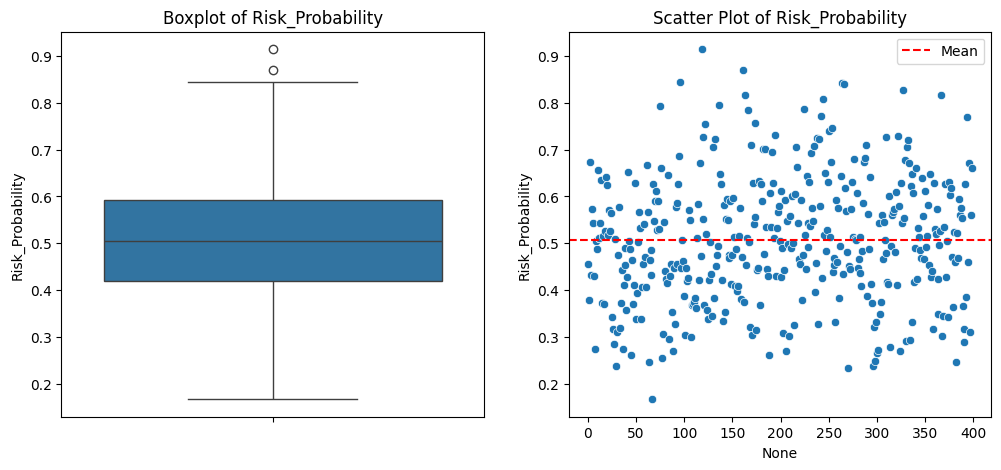

In [ ]:
# Function to visualize outliers using boxplot and scatter plot
def visualize_outliers(data, column):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=data.index, y=data[column])
    plt.axhline(data[column].mean(), color='red', linestyle='dashed', label='Mean')
    plt.title(f'Scatter Plot of {column}')
    plt.legend()

    plt.show()

# Visualize outliers for numerical columns
for col in numerical_features:
    visualize_outliers(pd.DataFrame(data), col)

In [ ]:
# Dictionary to store outliers for each numerical column
outlier_dict = {}

# Detect outliers for each numerical column using IQR
for col in numerical_features:
    outliers_iqr = detect_outliers_iqr(pd.DataFrame(data), col)
    outlier_dict[col] = outliers_iqr

# Display the detected outliers in a structured way
print("=" * 50)
print("          Outlier Detection using IQR")
print("=" * 50)

for col, outliers in outlier_dict.items():
    print(f"\n **{col}** - Outliers detected: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.to_string(index=False))
    else:
        print(" No outliers detected.")
    print("-" * 50)

          Outlier Detection using IQR

 **Import_Frequency** - Outliers detected: 0
 No outliers detected.
--------------------------------------------------

 **Import_Quantity (kg)** - Outliers detected: 100
Importer_ID  Import_Frequency  Import_Quantity (kg)                                                                  Chemical_Name  HS Code Country_of_Origin                                  Importation_Description Compliance_History  Past_Violations Financial_Stability Risk_Category  Import_Frequency_Norm  Import_Quantity_Norm  Past_Violations_Norm  Risk_Probability
     IMP114               140                114397                         Hydrogen peroxide, whether or not solidified with urea   280120    United Kingdom            Agriculture sector, soil nutrient enhancement               Good                3              Medium     Not Risky               0.939597              0.231320                   0.6          0.512092
     IMP115                62                40695

## **Visualizing the Distribution of the Numerical columns**

ValueError: num must be an integer with 1 <= num <= 6, not 7

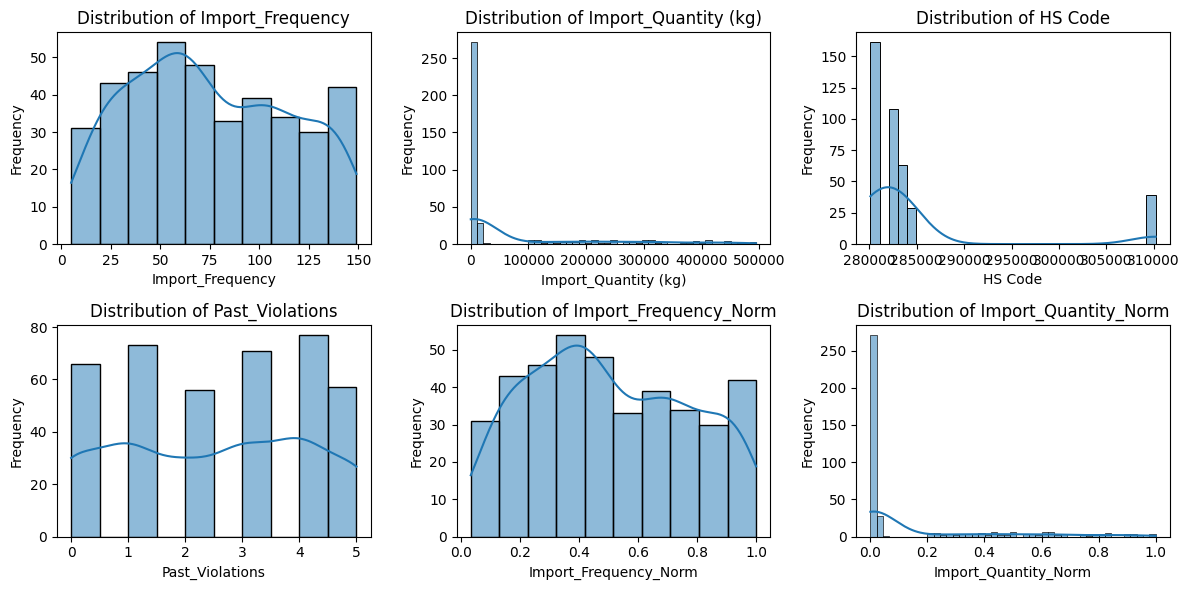

In [ ]:
# Visulaizing the Distribution of the Numerical Features
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

# Displaying the Plot
plt.show()

# **Data Preprocessing**

## **Data Cleaning**

In [ ]:
# Step 1: Removing whitespaces from the object type columns

# List of categorical columns
categorical_cols = ["Chemical_Name", "Country_of_Origin", "Importation_Description", "Compliance_History", "Financial_Stability"]

# Remove leading and trailing whitespaces from object type columns
for col in categorical_cols:
    if data[col].dtype == 'object':
        data[col] = data[col].str.strip()

In [ ]:
# Step 2: Dropping duplicate values
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
# Display dataset information
print("\nDataset information after removing duplicates:")
data.info()

## **Categorical Columns**



## **Data Encoding**

In [ ]:
# Step 3: Encoding the Categorical Columns
categorical_cols = ["Chemical_Name", "Country_of_Origin", "Importation_Description", "Compliance_History", "Financial_Stability"]
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
categorical_data = encoder.fit_transform(data[categorical_cols])

# Convert to DataFrame
cat_data = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

## **Numerical Columns**

## **Handling the Outliers**

In [ ]:
# Step 4: Handling the Outliers in the Numerical Columns
for col in numerical_features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])

In [ ]:
# Dictionary to store outliers for each numerical column
outlier_dict = {}

# Detect outliers for each numerical column using IQR
for col in numerical_features:
    outliers_iqr = detect_outliers_iqr(pd.DataFrame(data), col)
    outlier_dict[col] = outliers_iqr

# Display the detected outliers in a structured way
print("=" * 50)
print("          Outlier Detection using IQR")
print("=" * 50)

for col, outliers in outlier_dict.items():
    print(f"\n **{col}** - Outliers detected: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.to_string(index=False))
    else:
        print(" No outliers detected.")
    print("-" * 50)

In [ ]:
# Step 5: Scaling the numerical features
numerical_cols = ["Import_Frequency", "Past_Violations", "Import_Quantity (kg)", "HS Code"]
scaler = StandardScaler()
numerical_data = scaler.fit_transform(data[numerical_cols])
num_data = pd.DataFrame(numerical_data, columns=numerical_cols)

# **Target Variable**

In [ ]:
# Step 6: Encoding the Target variable (Risk_Category)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["Risk_Category"])

In [ ]:
# Step 7: Combining processed features
X = pd.concat([num_data, cat_data], axis=1)

In [ ]:
# Visualizing the Distribution of the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Target Variable")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Visualizing the Target Variable
# plt.figure(figsize=(8, 6))
# sns.countplot(x='Risk_Category', data=data, palette='viridis')
# plt.title('Target Variable Distribution')
# plt.xlabel('Risk Category')
# plt.ylabel('Count')
# plt.show()

## **Handling the Imbalance Dataset**

In [ ]:
# Step 8: Handling the imbalance dataset

# Suppressing the FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Handling imbalanced dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset size:", X.shape)
print("Resampled dataset size:", X_resampled.shape)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_train is your target variable after applying SMOTE
unique, counts = np.unique(y_train, return_counts=True)

# Plotting the class distribution
plt.figure(figsize=(8, 6))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution After SMOTE')
plt.xticks(unique, labels=label_encoder.inverse_transform(unique), rotation=45)
plt.show()

In [ ]:
# Displaying the dataset shape after applying the SMOTE
print(f"Shape of X_resampled: {X_resampled.shape}")
print(f"Shape of y_resampled: {y_resampled.shape}")

In [ ]:
# Displaying the Columns in X
print("Columns in X Resampled:")
print(X_resampled.columns)

In [ ]:
# Displaying the Dataset Information
print("Dataset Information:")
print(data.info())

In [ ]:
# Displaying the Dataset Information
print("Dataset Information:")
print(data.info())

In [ ]:
# Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

# **Model Training**

## **Model Based on Gradient Boost**

In [ ]:
# Initialize and train Gradient Boosting Classifier
model = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10,
    warm_start=True,
    max_leaf_nodes=31,
    verbose=1
)

# Training the model on the training data
model.fit(X_train, y_train)

In [ ]:
# Save the model and preprocessors
joblib.dump(model, "gradient_boost_classifier.pkl")
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# **Explainable AI - XAI**

In [ ]:
# SHAP
# Initialize SHAP Explainer
explainer = shap.Explainer(model, X_train)

# SHAP Summary Plot (Global Feature Importance)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# SHAP Force Plot for a specific instance (Local Explanation)
shap.initjs()
shap.force_plot(shap_values[0], matplotlib=True)

In [ ]:
# LIME
# Initialize LIME Explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    mode="classification",
    training_labels=y_train,
    feature_names=X_train.columns,
    class_names=label_encoder.classes_,
    discretize_continuous=True
)

# Choose an instance from the test set to explain
instance = X_test.iloc[0]

# Explain the instance with LIME
explanation = explainer_lime.explain_instance(instance.values, model.predict_proba, num_features=5)

# Plot the explanation for the instance
explanation.as_pyplot_figure()
plt.show()

# **Prediction**

In [ ]:
# Function to make predictions
def predict_risk_category(input_data):
    """
    input_data: dict containing feature values.
    """
    # Load trained model and preprocessors
    model = joblib.load("gradient_boost_classifier.pkl")
    encoder = joblib.load("encoder.pkl")
    scaler = joblib.load("scaler.pkl")
    label_encoder = joblib.load("label_encoder.pkl")

    # Convert input into DataFrame
    input_data = pd.DataFrame([input_data])

    # Process categorical features
    cat_features = encoder.transform(input_data[categorical_cols])
    cat_data = pd.DataFrame(cat_features, columns=encoder.get_feature_names_out(categorical_cols))

    # Process numerical features
    num_features = scaler.transform(input_data[numerical_cols])
    num_data = pd.DataFrame(num_features, columns=numerical_cols)

    # Combine processed features
    processed_input = pd.concat([num_data, cat_data], axis=1)

    # Make prediction
    prediction = model.predict(processed_input)
    predicted_category = label_encoder.inverse_transform(prediction)[0]
    return predicted_category

# Example usage
example_input = {
    "Import_Frequency": 82,
    "HS Code": 280110,
    "Past_Violations": 3,
    "Import_Quantity (kg)": 17618,
    "Chemical_Name": "Chlorine",
    "Country_of_Origin": "Pakistan",
    "Importation_Description": "Industrial water purification & disinfection",
    "Compliance_History": "Excellent",
    "Financial_Stability": "High"
}

predicted_category = predict_risk_category(example_input)
print(f"Predicted Risk Category: {predicted_category}")